In [ ]:
#Importo le librerie 

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical, normalize, plot_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
import scikeras
from scikeras.wrappers import KerasClassifier

In [ ]:
pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importo il dataset e definisco il numero di input e di classi di output

AC = pd.read_excel('/content/AscVel.xlsx')
print(AC)

             Ax      fx          Ay      fy          Az      fz  Labels
0      0.911394  7109.0    0.920176    19.0    3.827030   390.0       0
1      0.837911  4082.0    0.916373  9042.0    3.379478  5664.0       0
2      0.825080  9082.0    0.896009  8691.0    2.916811  7714.0       0
3      0.823855  1660.0    0.840291   527.0    2.815620  9062.0       0
4      0.820812  4628.0    0.837213  6992.0    2.807744  9277.0       0
..          ...     ...         ...     ...         ...     ...     ...
145  112.656021   722.0  107.430817  2675.0  292.399017  2675.0       2
146   92.967850   234.0   87.457001   722.0  273.965240   722.0       2
147   49.133049   742.0   73.032364  2910.0  178.480057  2910.0       2
148   35.290642   214.0   63.397198   957.0  165.834213   742.0       2
149   24.261366   761.0   53.787792  2636.0  160.796646  2636.0       2

[150 rows x 7 columns]


In [ ]:
#Splitto il dataset (Opzionale)
#X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size=0.2)


             Ax      fx          Ay      fy          Az      fz
0      0.911394  7109.0    0.920176    19.0    3.827030   390.0
1      0.837911  4082.0    0.916373  9042.0    3.379478  5664.0
2      0.825080  9082.0    0.896009  8691.0    2.916811  7714.0
3      0.823855  1660.0    0.840291   527.0    2.815620  9062.0
4      0.820812  4628.0    0.837213  6992.0    2.807744  9277.0
..          ...     ...         ...     ...         ...     ...
145  112.656021   722.0  107.430817  2675.0  292.399017  2675.0
146   92.967850   234.0   87.457001   722.0  273.965240   722.0
147   49.133049   742.0   73.032364  2910.0  178.480057  2910.0
148   35.290642   214.0   63.397198   957.0  165.834213   742.0
149   24.261366   761.0   53.787792  2636.0  160.796646  2636.0

[150 rows x 6 columns]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

In [ ]:
#Preparo il dataset per addestrare la rete

X_train = AC.loc[:,'Ax':'fz']
Y_train = AC.loc[:,'Labels']
Y_train = to_categorical(Y_train)

In [ ]:
#Addestro il modello

model = Sequential()
model.add(Dense(25,input_dim = 6,activation = 'relu'))
model.add(Dense(25,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs = 100,batch_size = 5,verbose = 1)


Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 127.2239 - accuracy: 0.3267
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 35.5914 - accuracy: 0.4067
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 22.5821 - accuracy: 0.4533
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 14.5312 - accuracy: 0.4867
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 10.7608 - accuracy: 0.5067
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 8.0783 - accuracy: 0.5133
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 6.3009 - accuracy: 0.6133
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 5.8831 - accuracy: 0.6333
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 5.4053 - accuracy: 0.6533
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 4.5298 - accuracy: 0.6733
Epo

5/5 [==============================] - 0s 3ms/step - loss: 1.0461 - accuracy: 0.8733
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                175       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 3)                 78        
                                                                 
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________


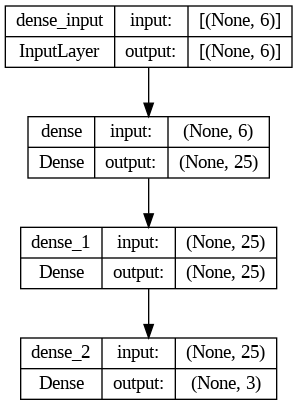

In [ ]:
#prediction = model.predict(X_test)
#print(prediction[:].round())
#print(Y_test)

#Valuto l'accuracy del modello e ne stampo il plot
model.evaluate(X_train,Y_train)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#Salvo il modello e lo converto(salvo sia in .h5 che in tflite)

model.save('modello_asc' + '.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimization = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()
open('modello_asc' + '.tflite','wb').write(tflite_model)

5704

[10, 11, 12, 13]


In [ ]:
!pip install q keras==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.10.0 which is incompatible.


In [ ]:
#Definisco il modello da usare le la grid_search

def define_model(neurons = 10,learning_rate = 0.001, momentum = 0.3):
    my_model = Sequential()
    my_model.add(Dense(neurons,activation = 'relu',kernel_initializer = 'uniform',input_dim = 6))
    my_model.add(Dense(neurons,activation = 'relu',kernel_initializer = 'uniform'))
    my_model.add(Dense(3,activation = 'softmax',kernel_initializer = 'uniform'))
    optimizer = SGD(lr = learning_rate, momentum = momentum)
    my_model.compile(loss = 'categorical_crossentropy',optimizer = optimizer,metrics = ['accuracy'])
    return my_model     

In [ ]:
#Tuning degli iperparametri

batch_size = 16
epochs = 100
my_model = KerasClassifier(neurons = 1,learning_rate = 0,momentum = 0,build_fn = define_model,epochs = epochs, batch_size = batch_size, verbose = 1)
learning_rate = [0.001,0.01,0.1]
momentum = [0.3,0.7,0.9]
neurons = [10,11,12,13,14,15]
param_grid = dict(learning_rate=learning_rate,momentum=momentum,neurons = neurons)
grid = GridSearchCV(estimator=my_model, param_grid = param_grid, n_jobs=16, cv =3)
grid.fit(X_train, Y_train) 


Epoch 1/100


/usr/local/lib/python3.8/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


10/10 [==============================] - 0s 2ms/step - loss: 1.1578 - accuracy: 0.3667
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0874 - accuracy: 0.3133
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0647 - accuracy: 0.3333
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0564 - accuracy: 0.3333
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0188 - accuracy: 0.3267
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0000 - accuracy: 0.3200
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9617 - accuracy: 0.3200
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9505 - accuracy: 0.3133
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9227 - accuracy: 0.3600
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9144 - accuracy: 0.4933
Epoch 11/100
10/10 [=

GridSearchCV(cv=3,
             estimator=KerasClassifier(batch_size=16, build_fn=<function define_model at 0x7f265d7faf70>, epochs=100, learning_rate=0, momentum=0, neurons=1),
             n_jobs=16,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'momentum': [0.3, 0.7, 0.9],
                         'neurons': [10, 11, 12, 13, 14, 15]})